In [1]:
#Classification Algo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb

In [3]:
titanic = pd.read_csv('C:/Users/rsrsp/OneDrive/Desktop/titanic_train.csv')

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

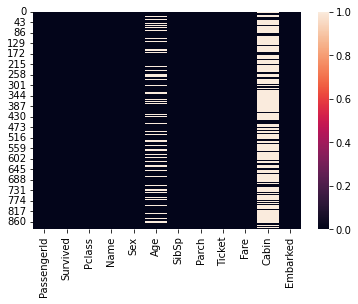

In [6]:
sb.heatmap(titanic.isnull())

In [7]:
titanic.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

<AxesSubplot:>

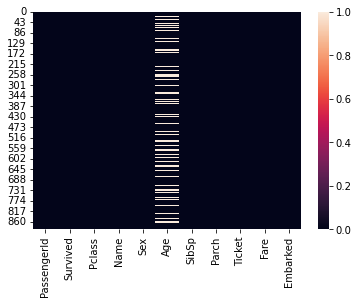

In [8]:
sb.heatmap(titanic.isnull())

<AxesSubplot:xlabel='Sex', ylabel='count'>

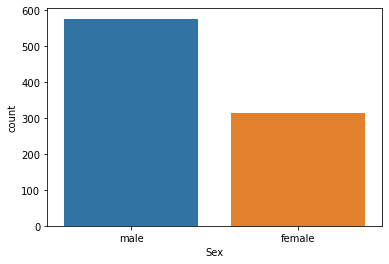

In [9]:
sb.countplot(data=titanic,x='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

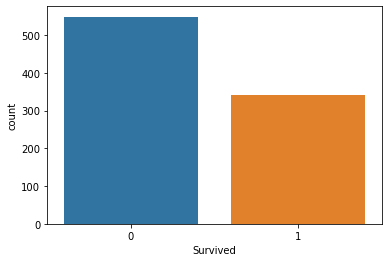

In [10]:
sb.countplot(data=titanic,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

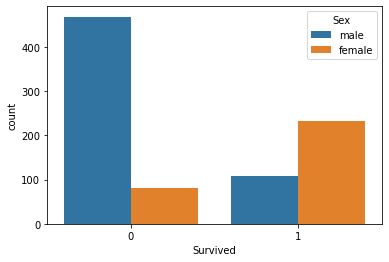

In [11]:
sb.countplot(data=titanic,x='Survived', hue='Sex')

In [12]:
#Now delete the columns which are non convertible to the category

In [13]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [14]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Fare'],axis=1,inplace=True)

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [16]:
#Sex and Embark cannot be plotted on the graph hence we have to convert into nnumerical data

In [17]:
gender = pd.get_dummies(titanic['Sex'], drop_first=True)

In [18]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [19]:
emb = pd.get_dummies(titanic['Embarked'], drop_first=True)
emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [20]:
titanic.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [21]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')

In [22]:
titanic = pd.concat([titanic,gender,emb], axis=1)

In [23]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S'], dtype='object')

In [24]:
titanic.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
male          0
Q             0
S             0
dtype: int64

In [25]:
titanic[titanic['Pclass']==1]['Age'].mean()

38.233440860215055

In [26]:
titanic[titanic['Pclass']==2]['Age'].mean()

29.87763005780347

In [27]:
titanic[titanic['Pclass']==3]['Age'].mean()

25.14061971830986

In [28]:
#38, 30, 25

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

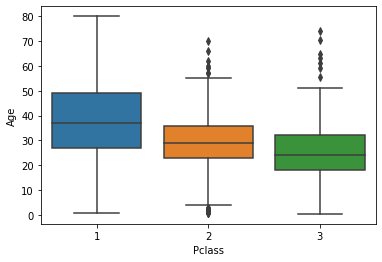

In [29]:
sb.boxplot(data=titanic,x='Pclass', y='Age')

In [30]:
#Final part of my data is clean the ages

In [31]:
def myclean(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [32]:
titanic['Age']=titanic[['Age', 'Pclass']].apply(myclean,axis=1)

In [33]:
titanic.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
male        0
Q           0
S           0
dtype: int64

<AxesSubplot:>

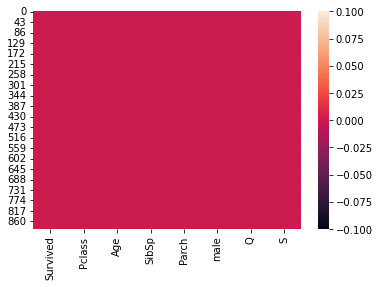

In [34]:
sb.heatmap(titanic.isnull())

<AxesSubplot:>

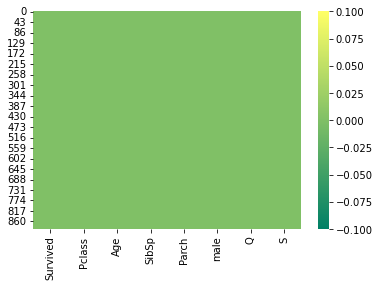

In [35]:
sb.heatmap(titanic.isnull(),cmap='summer')

<AxesSubplot:>

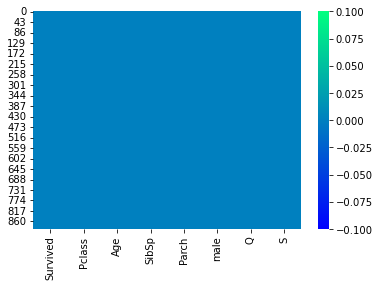

In [36]:
sb.heatmap(titanic.isnull(),cmap='winter')

<AxesSubplot:>

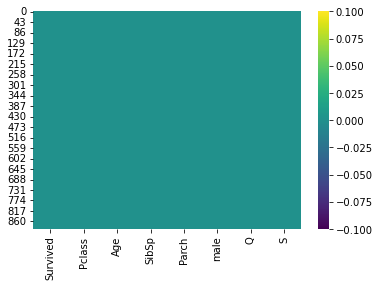

In [37]:
sb.heatmap(titanic.isnull(),cmap='viridis')

<AxesSubplot:>

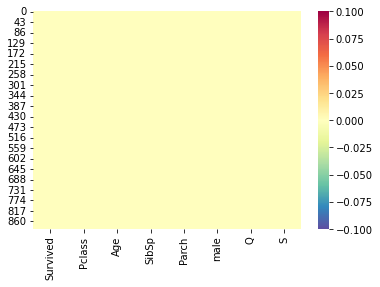

In [38]:
sb.heatmap(titanic.isnull(),cmap='Spectral_r')

In [39]:
titanic.to_csv('titanic_clean.csv')

In [40]:
#above data is exported to the file titanic_clean.csv

In [41]:
#apply classification model to the given data

In [42]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S'], dtype='object')

In [43]:
y=titanic['Survived']
X=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S']]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y,test_size=0.33)

In [46]:
#for classification we use logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
d2 = LogisticRegression()

In [49]:
d2.fit(Xtrain, ytrain)

C:\Users\rsrsp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
d2.coef_

array([[-1.1349977 , -0.03746905, -0.209519  , -0.04938121, -2.59349813,
         0.25595165, -0.46643255]])

In [51]:
d2.intercept_

array([5.10872937])

<AxesSubplot:xlabel='Survived', ylabel='count'>

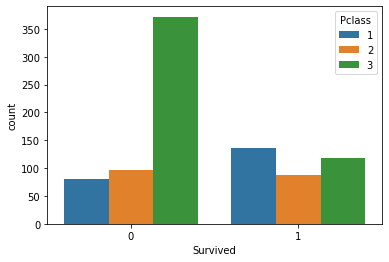

In [52]:
sb.countplot(data=titanic, x = 'Survived', hue='Pclass')

In [53]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S'], dtype='object')

In [60]:
d2.predict([[3, 34, 0, 0, 0, 1, 0]])

C:\Users\rsrsp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [87]:
from sklearn.datasets import load_iris

In [93]:
flower = load_iris()

In [94]:
print(flower.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [95]:
flower.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [96]:
flower.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [97]:
dflower=pd.DataFrame(flower.data, columns = flower.feature_names)

In [98]:
dflower

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [99]:
dtarget = pd.DataFrame(flower.target,columns=['target'])

In [100]:
dtarget

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [101]:
fflower=pd.concat([dflower,dtarget],axis=1)

In [102]:
fflower

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [103]:
from sklearn.datasets import load_diabetes

In [104]:
diabetic = load_diabetes()

In [106]:
print(diabetic.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [107]:
ddiabetic=pd.DataFrame(diabetic.data,columns=diabetic.feature_names)

In [108]:
ddiabetic

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
